In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
from sklearn.datasets import make_blobs

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
MS = MeanShift(bandwidth=bandwidth, bin_seeding=True)
MS.fit(X)
y_MS=MS.fit_predict(X)

In [7]:
cluster_centers_indices = MS.cluster_centers_
labels = MS.labels_

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [9]:
n_clusters_ = len(cluster_centers_indices)

In [10]:
n_clusters_

3

In [11]:
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


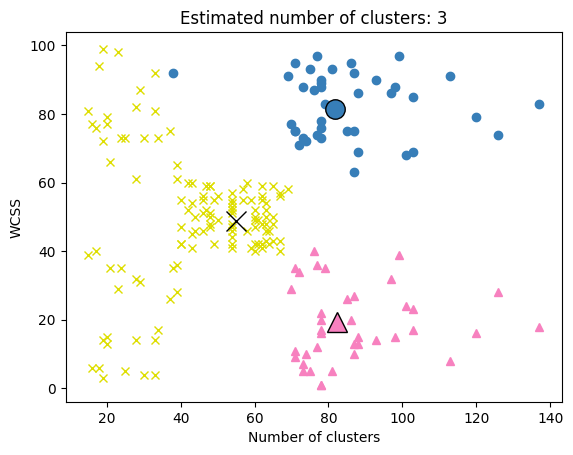

In [12]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers_indices[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
MS = MeanShift(bandwidth=bandwidth, bin_seeding=True)
MS=MeanShift(bandwidth=2).fit(X)
y_MS=MS.fit_predict(X)

In [14]:
y_MS

array([137, 136,  42,  43, 135,  43,  42, 134, 133, 132,  19, 131,  19,
        41,  19,  41, 130, 129, 128, 127, 126,  40, 125,  40, 124, 122,
        39, 123,  39, 121, 120, 119, 118, 115, 117, 116, 114, 113, 112,
       111,  38, 110,  38, 108, 109, 107, 105, 106,  37,  37, 104,  36,
       102,  36,  18, 103, 101,  18,   6,  18,  35,  35,   6,  17,   6,
        17,   6,  16,  17,  16,  34, 100,  99,  34,  14,   2,   2,  14,
         2,  33,   2,  13,  33,  15,  13,  14,  98,  32,  96,  97,  32,
         5,   1,   5,   5,  11,   1,   1,   0,   1,   0,   4,  95,  12,
        12,   0,   3,   4,  10,   4,  11,  12,  10,   4,   3,   3,  31,
        94,  31,  30,  30,  93,  92,  91,  90,  89,  27,  88,  29,  28,
        29,  28,  27,  87,   9,  86,   9,  26,  85,  26,   9,  84,  83,
        82,  81,  79,  80,  25,  22,   8,  23,   8,  22,  21,  23,   8,
        24,  21,  24,  25,  78,  77,  76,  75,  74,  20,  73,  72,  70,
        69,   7,  20,  71,  68,   7,  66,   7,  67,  65,  64,  6

In [15]:
supervised=dataset

In [16]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [18]:
supervised['Cluster_group']=labels

In [19]:
centroids=MS.cluster_centers_

In [20]:
centroids

array([[ 62.        ,  42.        ],
       [ 60.6       ,  48.6       ],
       [ 54.        ,  53.        ],
       [ 64.        ,  49.        ],
       [ 63.        ,  47.        ],
       [ 60.        ,  41.25      ],
       [ 47.25      ,  51.        ],
       [ 87.66666667,  13.66666667],
       [ 78.        ,  89.        ],
       [ 73.66666667,   5.66666667],
       [ 64.        ,  42.66666667],
       [ 63.        ,  52.        ],
       [ 62.33333333,  55.        ],
       [ 54.        ,  55.33333333],
       [ 54.        ,  47.        ],
       [ 54.        ,  44.        ],
       [ 48.        ,  48.33333333],
       [ 47.66666667,  59.        ],
       [ 44.33333333,  45.66666667],
       [ 19.66666667,  14.        ],
       [ 86.        ,  75.        ],
       [ 78.        ,  77.        ],
       [ 78.        ,  21.        ],
       [ 78.        ,  16.5       ],
       [ 78.        ,   1.        ],
       [ 77.5       ,  73.5       ],
       [ 73.5       ,  72.5       ],
 

In [21]:
supervised.columns[3]

'Annual Income (k$)'

In [22]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [23]:
supervised.to_csv("cluster.csv",index=False)

C:\Users\ANIRUDH\anaconda3\envs\AIML\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


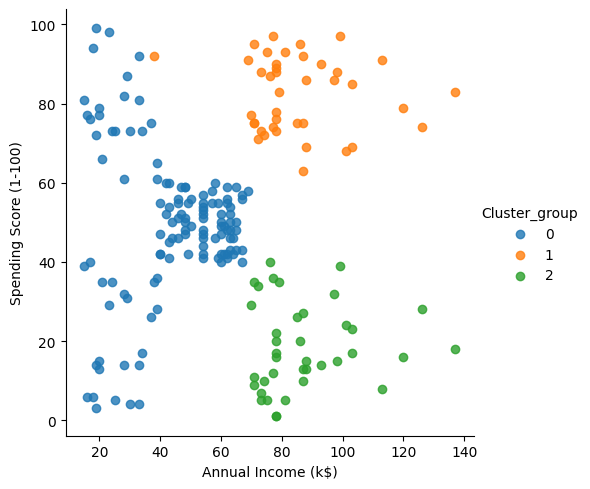

In [24]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)